### Question 1 : Route Between Nodes
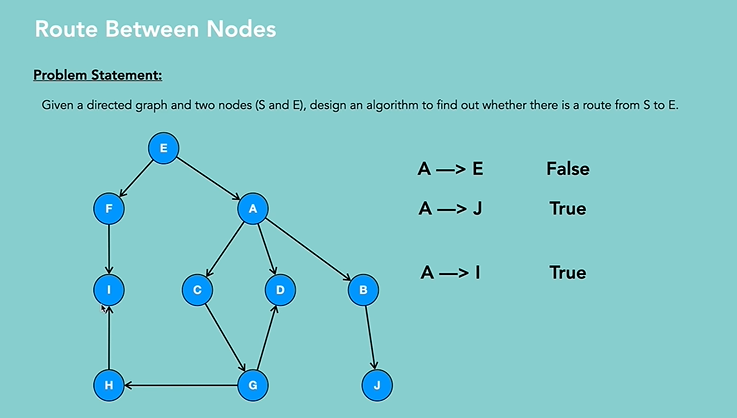

### Pseudo Code
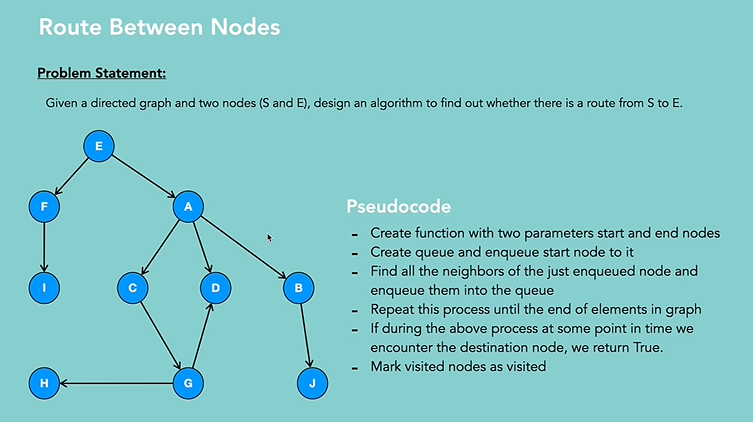

In [1]:
class Graph:
    def __init__(self, gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    
    def addEdge(self, vertex, edge):
        self.gdict[vertex].append(edge)
    
    def checkRoute(self, startNode, endNode):
        visited = [startNode]
        queue = [startNode]
        path = False
        while queue:
            deVertex = queue.pop(0)
            for adjacentVertex in self.gdict[deVertex]:
                if adjacentVertex not in visited:
                    if adjacentVertex == endNode:
                        path = True
                        break
                    else:
                        visited.append(adjacentVertex)
                        queue.append(adjacentVertex)
        return path
 


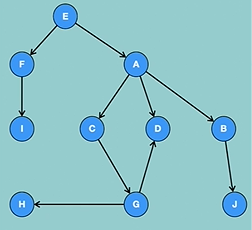

In [2]:
customDict = { "a" : ["c","d", "b"],
            "b" : ["j"],
            "c" : ["g"],
            "d" : [],
            "e" : ["f", "a"],
            "f" : ["i"],
            "g" : ["d", "h"],
            "h" : [],
            "i" : [],
            "j" : []
               }



g = Graph(customDict)
print(g.checkRoute("a", "j"))



True


### Question 2 : Minimal Tree
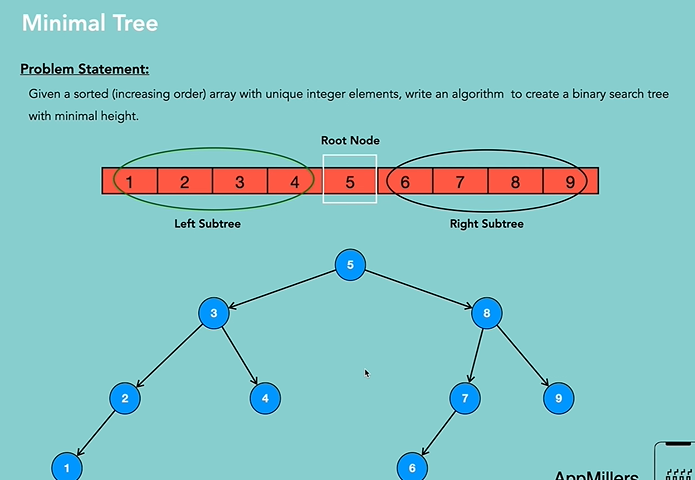

In [3]:
class BSTNode:
    def __init__(self, data=None, left = None, right= None):
        self.data = data
        self.left = left
        self.right = right
    
    def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = '%s' % self.data
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = '%s' % self.data
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = '%s' % self.data
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = '%s' % self.data
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2

def minimalTree(sortedArray):
    if len(sortedArray) == 0:
        return None
    if len(sortedArray) == 1:
        return BSTNode(sortedArray[0])
    mid = int(len(sortedArray)/2)
    left = minimalTree(sortedArray[:mid])
    right = minimalTree(sortedArray[mid+1:])
    return BSTNode(sortedArray[mid], left, right)

sortedArray = [1,2,3,4,5,6,7,8,9]
bst = minimalTree(sortedArray)
bst.display()


   _5__  
  /    \ 
  3    8 
 / \  / \
 2 4  7 9
/    /   
1    6   


### Question 3 : List of Depths
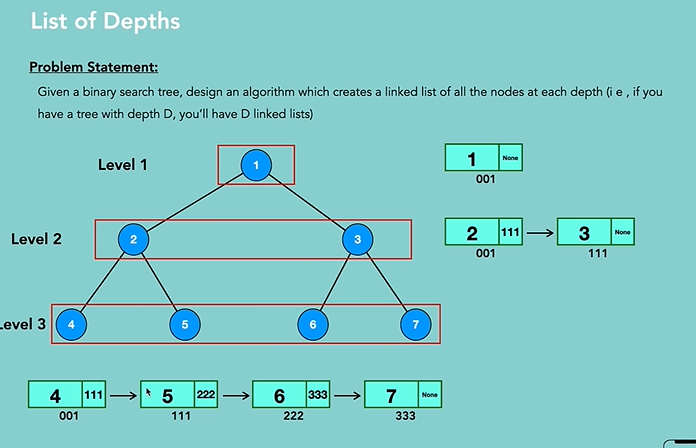

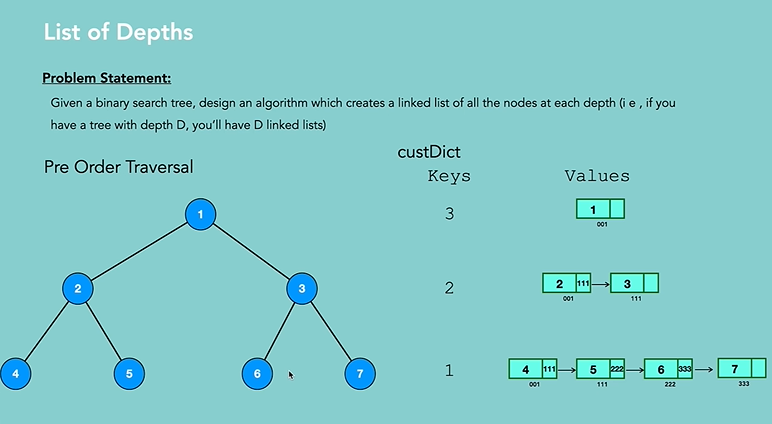

In [5]:
# List of Depth
class LinkedList:
    def __init__(self, val):
        self.val = val
        self.next = None
    
    def add(self, val):
        if self.next == None:
            self.next = LinkedList(val)
        else:
            self.next.add(val)
    def __str__(self):
        return "({val})".format(val = self.val) + str(self.next)

class BinaryTree:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
    
def depth(tree):
    if tree == None:
        return 0
    if tree.left == None  and tree.right == None:
        return 1
    else:
        depthLeft = 1 + depth(tree.left)
        depthRight = 1 + depth(tree.right)
        if depthLeft > depthRight:
            return depthLeft
        else:
            return depthRight

def treeToLinkedList(tree, custDict = {}, d = None):
    if d == None:
        d = depth(tree)
    if custDict.get(d) == None:
        custDict[d] = LinkedList(tree.val)
    else:
        custDict[d].add(tree.val)
        if d == 1:
            return custDict
    if tree.left != None:
        custDict = treeToLinkedList(tree.left, custDict, d-1)
    if tree.right != None:
        custDict = treeToLinkedList(tree.right, custDict, d-1)
    return custDict



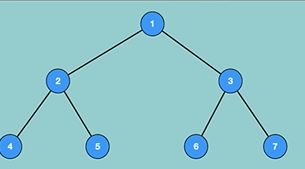

In [6]:
mainTree = BinaryTree(1)
two = BinaryTree(2)
three = BinaryTree(3)
four = BinaryTree(4)
five = BinaryTree(5)
six = BinaryTree(6)
seven = BinaryTree(7)
mainTree.left = two
mainTree.right = three
two.left = four
two.right = five
three.left = six
three.right = seven

custDict = treeToLinkedList(mainTree)
for depthLevel, linkedList in custDict.items():
     print("{0} {1}".format(depthLevel, linkedList))

3 (1)None
2 (2)(3)None
1 (4)(5)(6)(7)None


### Question 4 : Check Balanced
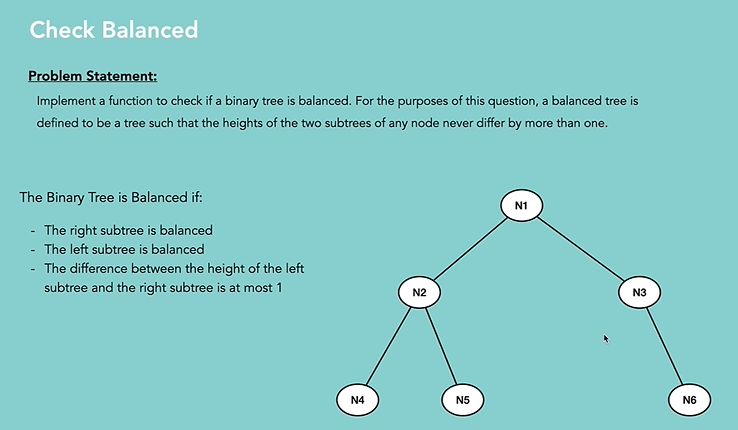


In [7]:
def isBalancedHelper(root):
    if root is None:
        return 0
    leftHeight = isBalancedHelper(root.left)
    if leftHeight == -1:
        return -1
    rightHeight = isBalancedHelper(root.right)
    if rightHeight == -1:
        return -1
    if abs(leftHeight-rightHeight)>1:
        return -1
    
    return max(leftHeight, rightHeight) + 1

def isBalanced(root):
    return isBalancedHelper(root) > -1

class Node():
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right


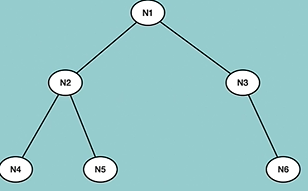

In [8]:

N1 = Node("N1")
N2 = Node("N2")
N3 = Node("N3")
N4 = Node("N4")
N5 = Node("N5")
N6 = Node("N6")
N1.left = N2
N1.right = N3
N2.left = N4
N2.right = N5
N3.right = N6

print(isBalanced(N1))

True


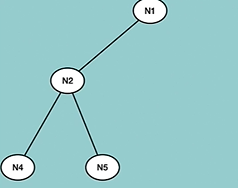

In [10]:

N1 = Node("N1")
N2 = Node("N2")
N4 = Node("N4")
N5 = Node("N5")
N6 = Node("N6")
N1.left = N2

N2.left = N4
N2.right = N5


print(isBalanced(N1))

False


### Question 5 : Vadidate Binary Search Tree
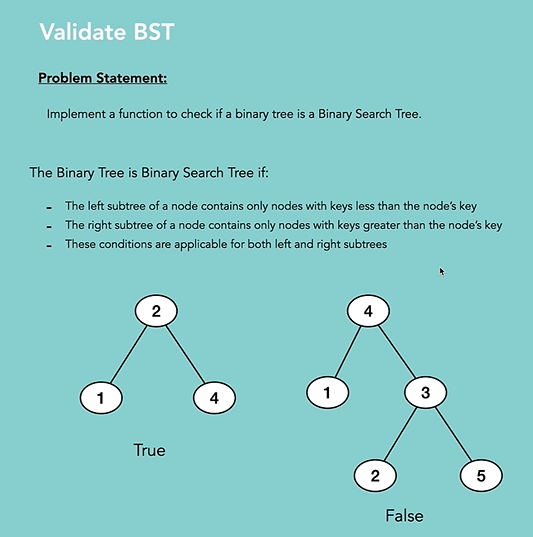

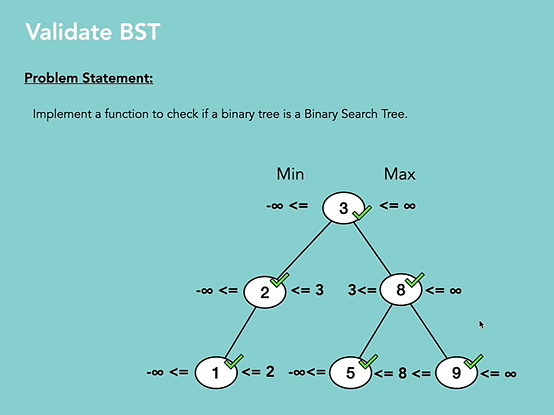

In [11]:

class TreeNode:
     def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def helper(node, minValue = float('-inf'), maxValue = float('inf')):
    if not node:
        return True
    val = node.val
    if val <= minValue or val >= maxValue:
        return False
    
    if not helper(node.right, val, maxValue):
        return False
    
    if not helper(node.left, minValue, val):
        return False
    
    return True

def isValidBST(root):
    return helper(root)



In [12]:

root1 = TreeNode(2)
root1.left = TreeNode(1)
root1.right = TreeNode(4)

print(isValidBST(root1))


True


In [13]:

root2 = TreeNode(4)
root2.left = TreeNode(1)
root2.right = TreeNode(3)

print(isValidBST(root2))

False


### Question : 6 Inorder Successor
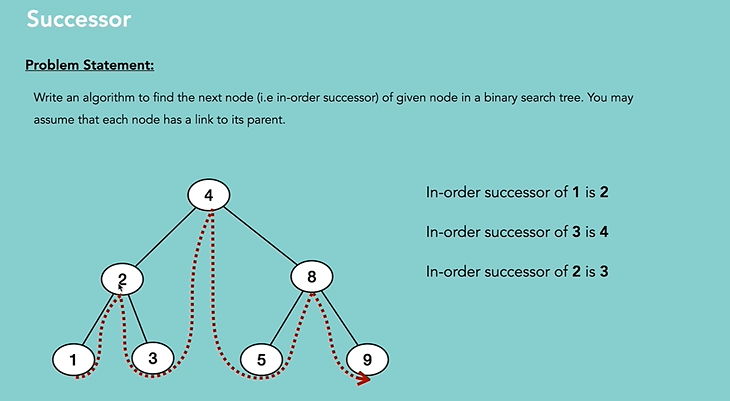

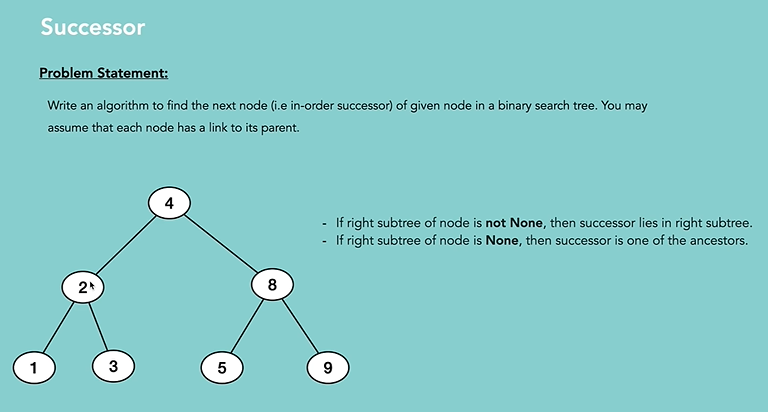

In [ ]:


class Node: 
    def __init__(self, key): 
        self.data = key 
        self.left = None
        self.right = None

def minValue(node):
    current = node
    while (current is not None):
        if current.left is None:
            break
        current = current.left
    return current

def inOrderSuccessor(root, n):
    if n.right is not None:
        return minValue(n.right)

    p = n.parent
    while p is not None:
        if n != p.right:
            break
        n = p
        p = p.parent
    return p 

def insert(node, data):
    if node is None:
        return Node(data)
    else:
        if data <= node.data:
            temp = insert(node.left, data)
            node.left = temp
            temp.parent = node
        else:
            temp = insert(node.right, data)
            node.right = temp
            temp.parent = node      
        return node






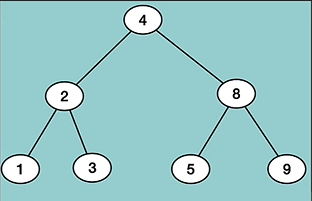

In [ ]:

root = None
root = insert(root, 4)
root = insert(root, 2)
root = insert(root, 8)
root = insert(root, 1)
root = insert(root, 3)
root = insert(root, 5)
root = insert(root, 9)

temp = root.left #2

successor = inOrderSuccessor(root, temp)
print(successor.data)

if successor is not None:
    print("Inorder successor of %d is %d" %(temp.data, successor.data))
else:
    print("Inorder successor does not exist")

### Question 7 : Build Order
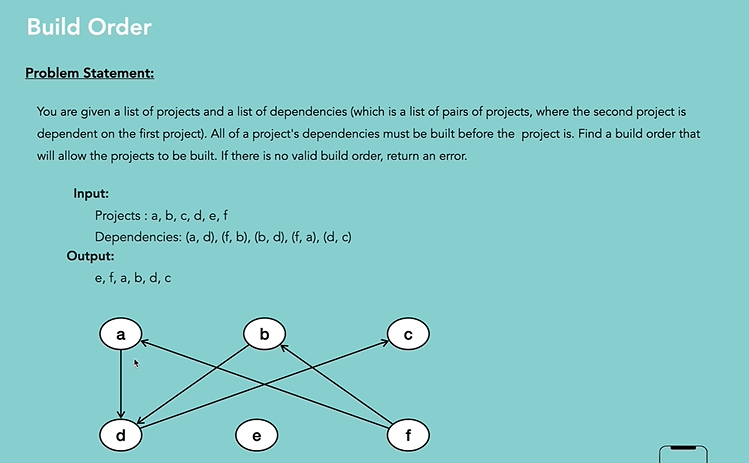

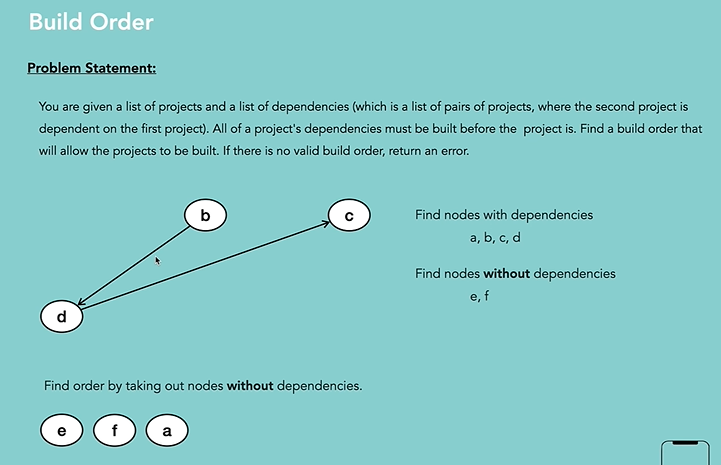

In [14]:
def create_graph(projects, dependencies):
    project_graph = {}
    for project in projects:
        project_graph[project] = []
    for pairs in dependencies:
        project_graph[pairs[0]].extend(pairs[1])
    return project_graph
graph = create_graph(['A', 'B', 'C', 'D', 'E', 'F'], [('A','D'), ('F', 'B'), ('B','D'), ('F','A'), ('D','C')])
# print(graph)
 
def get_projects_with_dependencies(graph):
    projects_with_depen = set()
    for project in graph:
        # addin values from dictionaty because values are dependednt of key
        projects_with_depen = projects_with_depen.union(set(graph[project]))
   
    return projects_with_depen
 
dependents = get_projects_with_dependencies(graph)
# print(dependents)
 
def get_projects_wo_dependencies(projects_with, graph):
    projects_wo_dependencies = set()
    for project in graph:
        if not project in projects_with:
            projects_wo_dependencies.add(project)
    return projects_wo_dependencies
notDependents = get_projects_wo_dependencies(dependents, graph)
# print(notDependents)
 
def find_build_order(projects, dependencies):
    build_order = []
    project_graph = create_graph(projects, dependencies)
    while project_graph:
        print(project_graph)
        projects_with_depen = get_projects_with_dependencies(project_graph)
        projects_wo_depen = get_projects_wo_dependencies(projects_with_depen, project_graph)
        print(projects_wo_depen)
        if len(projects_wo_depen) == 0 and project_graph:
            raise ValueError('There is a cycle in the build order')
        for independent_project in projects_wo_depen:
            build_order.append(independent_project)
            del project_graph[independent_project]
    return build_order
 
print(find_build_order(['A', 'B', 'C', 'D', 'E', 'F'], [('A','D'), ('F', 'B'), ('B','D'), ('F','A'), ('D','C')]))

{'A': ['D'], 'B': ['D'], 'C': [], 'D': ['C'], 'E': [], 'F': ['B', 'A']}
{'F', 'E'}
{'A': ['D'], 'B': ['D'], 'C': [], 'D': ['C']}
{'B', 'A'}
{'C': [], 'D': ['C']}
{'D'}
{'C': []}
{'C'}
['F', 'E', 'B', 'A', 'D', 'C']


### Question 8 : First Common Ancestor
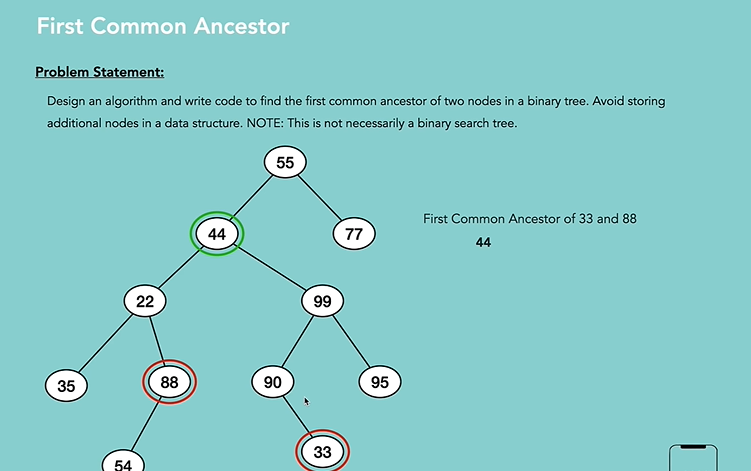

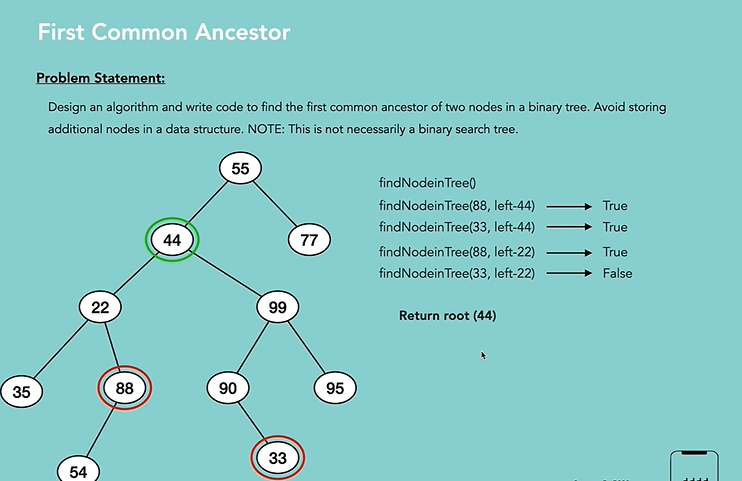